# Assignment 2 - Classification of fashion-mnist (1-dimensional without using CNN)
## Experimenting with regularization and optimization
### Machine Learning in Industrial Environments

The objective of the **Assignment 2** is learn and practice about the different consequences and possibilities we have when training a deep NN.

You are going to be invited to carry out some experiments, where you will have to try different regulatization and optimization strategies.

Follow the instructions give in this notbook and complete the required parts, consulting the official Tensorflow-Keras documentation, and providing results of your experiments.

Finally, prepare a PDF document where you can just summary what you have done, what you have had as results (values and graphics), and an explanation about the **reasons** of the different results.

You have to update your final .ipynb document and the corresponding PDF.  Assignment 2 - Classification of fashion-mnist (1-dimensional without using CNN)
## Experimenting with regularization and optimization
### Machine Learning in Industrial Environments
The objective of the **Assignment 2** is learn and practice about the different consequences and possibilities we have when training a deep NN.

You are going to be invited to carry out some experiments, where you will have to try different regulatization and optimization strategies.

Follow the instructions give in this notbook and complete the required parts, consulting the official Tensorflow-Keras documentation, and providing results of your experiments.

Finally, prepare a PDF document where you can just summary what you have done, what you have had as results (values and graphics), and an explanation about the **reasons** of the different results.

You have to update your final .ipynb document and the corresponding PDF.

In [4]:
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras import layers, Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow import keras
import tensorflow as tf

import matplotlib.pyplot as plt


#### Fashion MNIST famous data set

In [5]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train / 255.0
x_test = x_test / 255.0

4422102/4422102 [==============================] - 0s 0us/step




---


**Task 1.** Visualize an element of the train and test data set (the images)

---



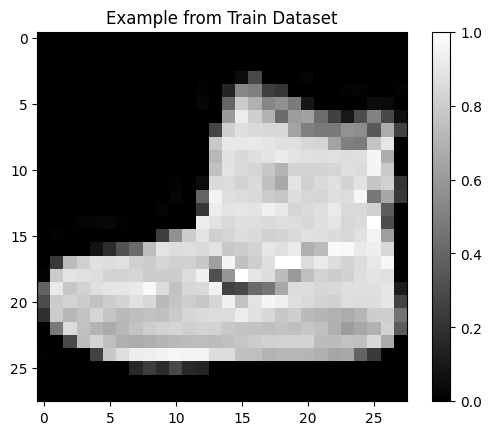

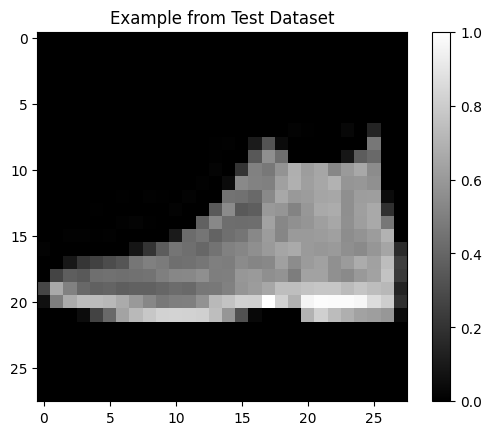

In [6]:
# Load the Fashion MNIST dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Normalize the pixel values to be in the range [0, 1] (Preprocessing)
x_train = x_train / 255.0
x_test = x_test / 255.0

# Visualize an element from the train dataset
plt.figure()
plt.imshow(x_train[0], cmap='gray')  # Display the first image from the train dataset
plt.colorbar()
plt.title('Example from Train Dataset')
plt.show()

# Visualize an element from the test dataset
plt.figure()
plt.imshow(x_test[0], cmap='gray')  # Display the first image from the test dataset
plt.colorbar()
plt.title('Example from Test Dataset')
plt.show()


**Auxiliary functions**

In [7]:
def plot_acc(history, title="Model Accuracy"):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title(title)
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')
    plt.show()

def plot_loss(history, title="Model Loss"):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title(title)
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper right')
    plt.show()

def plot_compare_losses(history1, history2, name1="Red 1",
                        name2="Red 2", title="Graph title"):
    plt.plot(history1.history['loss'], color="green")
    plt.plot(history1.history['val_loss'], 'r--', color="green")
    plt.plot(history2.history['loss'], color="blue")
    plt.plot(history2.history['val_loss'], 'r--', color="blue")
    plt.title(title)
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train ' + name1, 'Val ' + name1,
                'Train ' + name2, 'Val ' + name2],
               loc='upper right')
    plt.show()

def plot_compare_accs(history1, history2, name1="Red 1",
                      name2="Red 2", title="Graph title"):
    plt.plot(history1.history['accuracy'], color="green")
    plt.plot(history1.history['val_accuracy'], 'r--', color="green")
    plt.plot(history2.history['accuracy'], color="blue")
    plt.plot(history2.history['val_accuracy'], 'r--', color="blue")
    plt.title(title)
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train ' + name1, 'Val ' + name1,
                'Train ' + name2, 'Val ' + name2],
               loc='lower right')
    plt.show()

**Common tasks... here just 80% training and 20% test (only two sets)**

In [8]:
# Variables
batch_size = 64 # Number of samples processed before updating the model's parameters
num_classes = 10 # Number of classes in the dataset
epochs = 300 # Number of times the entire dataset will be passed forward and backward through the neural network during training

# One-hot encoding of y
# Convert class vectors to binary class matrices (one-hot encoding)
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# Flatten 28x28 images to a 1D array of 784 elements
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
# Convert data type and scale values to the range [0, 1]
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# *Playing with activation functions*

**ACTIVATION FUNCTION: Sigmoid**

In [7]:
# SIGMOID
model = Sequential()
model.add(Dense(128, activation='sigmoid', input_shape=(784,))) # 1st dense layer
model.add(Dense(128, activation='sigmoid')) #2nd dense layer
model.add(Dense(64, activation='sigmoid')) #3rd dense layer
model.add(Dense(num_classes, activation='softmax')) #output layer
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 10)                650       
                                                                 
Total params: 125898 (491.79 KB)
Trainable params: 125898 (491.79 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
from tensorflow.keras.optimizers import SGD

# Compile
model.compile(loss='categorical_crossentropy', # Loss function
             optimizer='sgd', # Optimizer
             metrics=['accuracy']) # List of metrics to evaluate during training and testing

In [ ]:
# 20% test
history_sigmoid = model.fit(x_train, y_train, # Training data
                   batch_size = batch_size, # Number of samples per gradient update
                   epochs=epochs, # Number of epochs (passes through the entire dataset)
                   verbose=1, # Verbosity mode (1: progress bar, 0: silent)
                   validation_split = 0.2)  # Fraction of training data to be used as validation data

Epoch 1/300
750/750 [==============================] - 10s 8ms/step - loss: 2.3050 - accuracy: 0.1197 - val_loss: 2.2925 - val_accuracy: 0.1406
Epoch 2/300
750/750 [==============================] - 4s 5ms/step - loss: 2.2871 - accuracy: 0.1801 - val_loss: 2.2795 - val_accuracy: 0.2669
Epoch 3/300
750/750 [==============================] - 4s 5ms/step - loss: 2.2703 - accuracy: 0.2516 - val_loss: 2.2589 - val_accuracy: 0.1909
Epoch 4/300
750/750 [==============================] - 3s 4ms/step - loss: 2.2393 - accuracy: 0.2930 - val_loss: 2.2149 - val_accuracy: 0.3953
Epoch 5/300
750/750 [==============================] - 3s 4ms/step - loss: 2.1678 - accuracy: 0.3443 - val_loss: 2.1038 - val_accuracy: 0.2864
Epoch 6/300
750/750 [==============================] - 3s 4ms/step - loss: 2.0007 - accuracy: 0.3637 - val_loss: 1.8858 - val_accuracy: 0.3554
Epoch 7/300
750/750 [==============================] - 3s 4ms/step - loss: 1.7872 - accuracy: 0.3884 - val_loss: 1.7022 - val_accuracy: 0.429

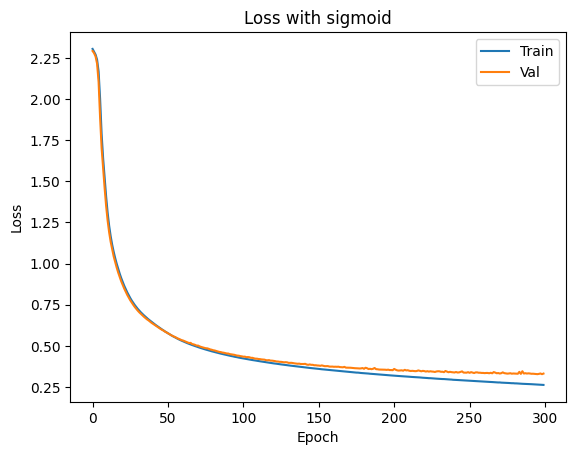

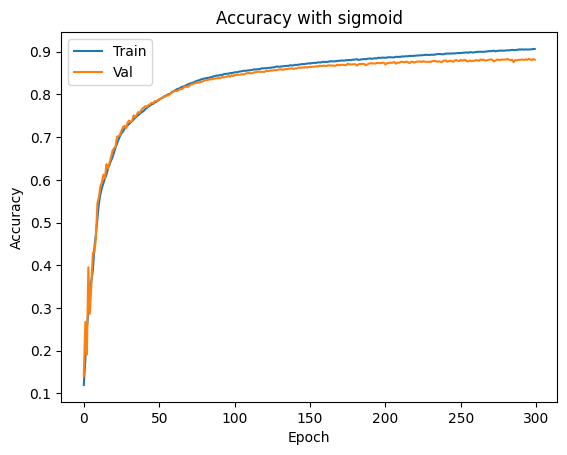

In [ ]:
plot_loss(history_sigmoid, title='Loss with sigmoid')
plot_acc(history_sigmoid, title='Accuracy with sigmoid')

# Loss function

Loss measures how well the model is performing on the training data by quantifying the difference between the predicted outputs and the true targets.

When regarding the loss function, the first apparent feature is that as the numbers of epochs increase, we observe different behavior between the actual values and the training values.

Otherwise, they closely overlap.
At the beginning of training (low number of epochs), both the training and validation loss are typically high because the model's parameters are initialized randomly and the model hasn't learned and meaningful patterns from the data yet.

Then, we observe a quick decrease because of the model's growing ability to quickly understand easy-to-interpret patterns in the data. First patterns are detected and the model is starting to learn.

In the late training phase, the loss continues to decrease but at a slower rate. The slowdown is because the model has already learned the most obvious patterns and further optimization is increasingly challenging.

The validation loss does not decrease as quickly. This is also called overfitting, when the model begins to memorize the training data's noise, leading to a poorer performance on unseen data.

To further explain, the divergence between the validation loss and the training loss curves (especially towards later epochs), suggests that this model is overfitting to the training data.

# Accuracy

The beginning (at epoch 0) indicates a low accuracy of 0.1, which is not unusual since the model is still learning, indicating uncertainty and instability in its predictions.

However, the accuracy quickly gets better after the first 50 epochs, surging to an approximate accuracy of 0.8. The quick improvement shows the model is getting better at understanding the training data and making predictions that match what we want.

After the quick improvement, the model starts to get better more slowly. Even though it keeps getting more accurate, it's not improving as fast as before. This means that as time goes on, the improvements in accuracy become smaller and smaller.



---
**Task 2.** Play with the sigmoid activation function and SGD with different learning rates.... by default we have used 0.01, but try 0.1, 0.001 e.g. and add a markdown cell explaining your conclusions


---




In [ ]:
from keras.optimizers import SGD

# Define a list of learning rates to try
learning_rates = [0.1, 0.001]

# Dictionary to store training histories for different learning rates
history_dict = {}

# Iterate over different learning rates
for lr in learning_rates:
    # Define and compile the model with sigmoid activation function and SGD optimizer with the current learning rate
    model_sigmoid = Sequential()
    model_sigmoid.add(Dense(128, activation='sigmoid', input_shape=(784,)))
    model_sigmoid.add(Dense(128, activation='sigmoid'))
    model_sigmoid.add(Dense(64, activation='sigmoid'))
    model_sigmoid.add(Dense(num_classes, activation='softmax'))
    model_sigmoid.compile(loss='categorical_crossentropy',
                          optimizer=SGD(learning_rate=lr),  # Use SGD optimizer with the current learning rate
                          metrics=['accuracy'])

    # Train the model
    # Fit the model to the training data
    # Store the training history in the dictionary with the current learning rate as the key
    history_dict[f'lr_{lr}'] = model_sigmoid.fit(
        x_train,
        y_train,
        batch_size=batch_size,
        epochs=epochs,
        verbose=0,  # Set verbose to 0 to suppress training progress output
        validation_split=0.2
    )


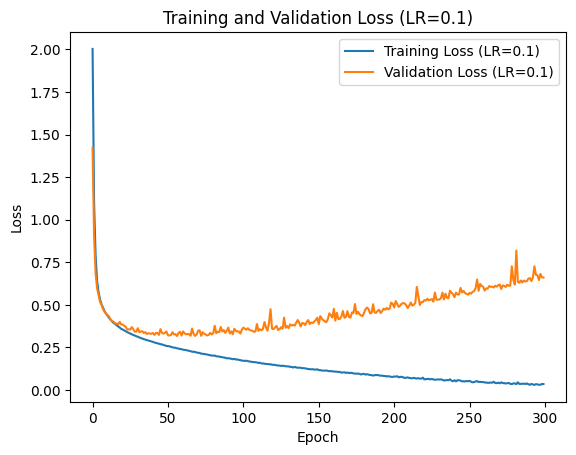

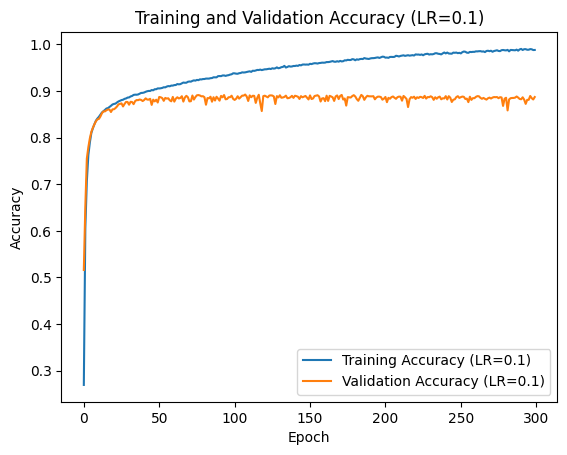

In [ ]:
import matplotlib.pyplot as plt

# Plot training and validation loss curves for learning rate 0.1
plt.plot(history_dict['lr_0.1'].history['loss'], label='Training Loss (LR=0.1)')
plt.plot(history_dict['lr_0.1'].history['val_loss'], label='Validation Loss (LR=0.1)')

plt.title('Training and Validation Loss (LR=0.1)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training and validation accuracy curves for learning rate 0.1
plt.plot(history_dict['lr_0.1'].history['accuracy'], label='Training Accuracy (LR=0.1)')
plt.plot(history_dict['lr_0.1'].history['val_accuracy'], label='Validation Accuracy (LR=0.1)')

plt.title('Training and Validation Accuracy (LR=0.1)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


# Learning rate 0.001

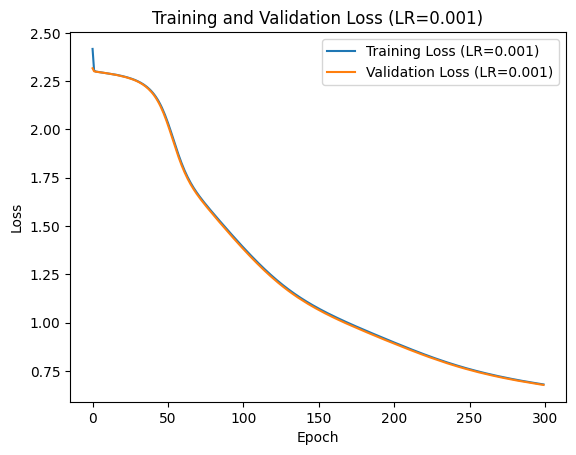

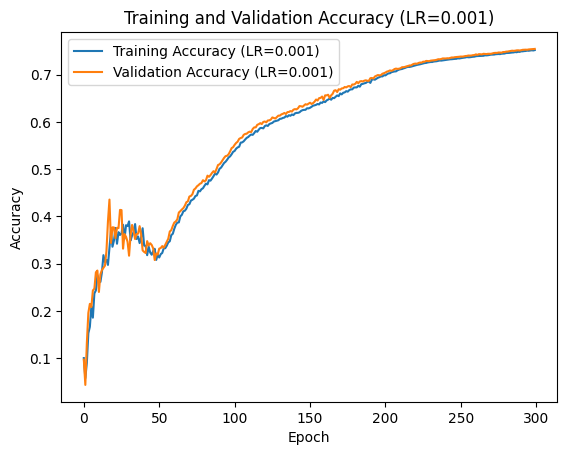

In [ ]:
# Learning rate 0.001

import matplotlib.pyplot as plt

# Plot training and validation loss curves for learning rate 0.001
plt.plot(history_dict['lr_0.001'].history['loss'], label='Training Loss (LR=0.001)')
plt.plot(history_dict['lr_0.001'].history['val_loss'], label='Validation Loss (LR=0.001)')

plt.title('Training and Validation Loss (LR=0.001)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training and validation accuracy curves for learning rate 0.001
plt.plot(history_dict['lr_0.001'].history['accuracy'], label='Training Accuracy (LR=0.001)')
plt.plot(history_dict['lr_0.001'].history['val_accuracy'], label='Validation Accuracy (LR=0.001)')

plt.title('Training and Validation Accuracy (LR=0.001)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


Your conclussions....




**ACTIVATION UNIT: Relu**

In [ ]:
# RELU
epochs = 120
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(784,)))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 128)               100480    
                                                                 
 dense_13 (Dense)            (None, 128)               16512     
                                                                 
 dense_14 (Dense)            (None, 64)                8256      
                                                                 
 dense_15 (Dense)            (None, 10)                650       
                                                                 
Total params: 125898 (491.79 KB)
Trainable params: 125898 (491.79 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
from tensorflow.keras.optimizers import SGD

sgd = SGD(lr=0.001)

# Compile
model.compile(loss='categorical_crossentropy',
             optimizer=sgd,
             metrics=['accuracy'])

In [ ]:
# 20% test
history_relu = model.fit(x_train, y_train,
                   batch_size = batch_size,
                   epochs=epochs,
                   verbose=1,
                   validation_split = 0.2)

Epoch 1/120
750/750 [==============================] - 4s 4ms/step - loss: 1.0100 - accuracy: 0.6666 - val_loss: 0.6341 - val_accuracy: 0.7834
Epoch 2/120
750/750 [==============================] - 4s 5ms/step - loss: 0.5843 - accuracy: 0.8000 - val_loss: 0.5488 - val_accuracy: 0.7967
Epoch 3/120
750/750 [==============================] - 3s 4ms/step - loss: 0.5082 - accuracy: 0.8220 - val_loss: 0.4793 - val_accuracy: 0.8314
Epoch 4/120
750/750 [==============================] - 3s 4ms/step - loss: 0.4737 - accuracy: 0.8337 - val_loss: 0.4555 - val_accuracy: 0.8422
Epoch 5/120
750/750 [==============================] - 3s 4ms/step - loss: 0.4495 - accuracy: 0.8425 - val_loss: 0.4639 - val_accuracy: 0.8344
Epoch 6/120
750/750 [==============================] - 3s 4ms/step - loss: 0.4302 - accuracy: 0.8499 - val_loss: 0.4557 - val_accuracy: 0.8403
Epoch 7/120
750/750 [==============================] - 3s 4ms/step - loss: 0.4160 - accuracy: 0.8542 - val_loss: 0.4343 - val_accuracy: 0.8474

KeyboardInterrupt: 

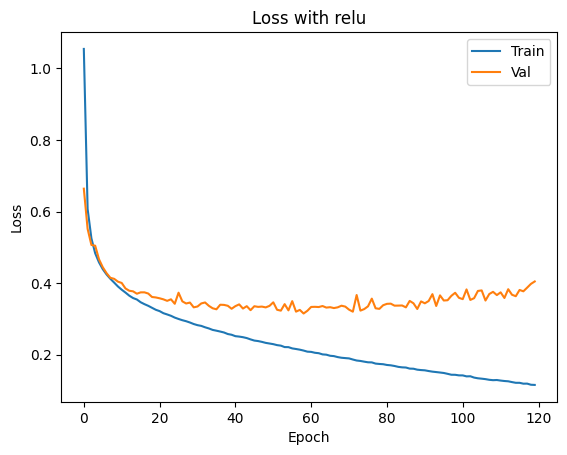

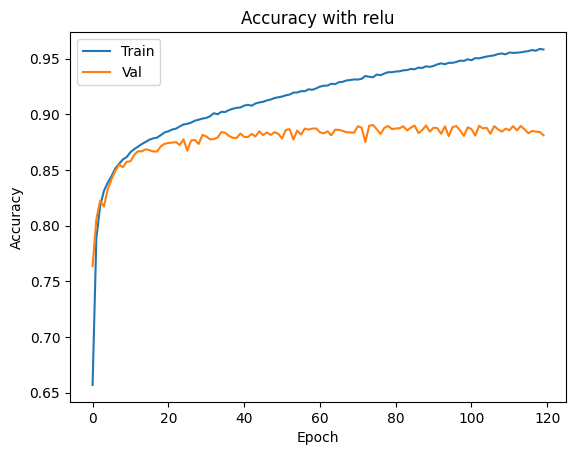

In [ ]:
plot_loss(history_relu, title='Loss with relu')
plot_acc(history_relu, title='Accuracy with relu')

**COMPARING SIGMOID with RELU**

<ipython-input-4-63cc78d4cea4>:22: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r--" (-> color='r'). The keyword argument will take precedence.
  plt.plot(history1.history['val_loss'], 'r--', color="green")
<ipython-input-4-63cc78d4cea4>:24: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r--" (-> color='r'). The keyword argument will take precedence.
  plt.plot(history2.history['val_loss'], 'r--', color="blue")


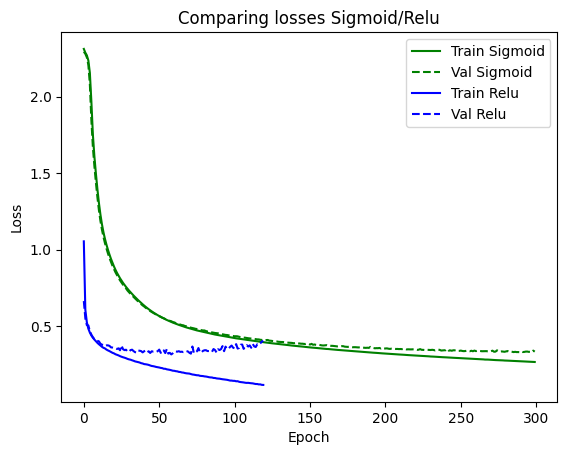

<ipython-input-4-63cc78d4cea4>:36: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r--" (-> color='r'). The keyword argument will take precedence.
  plt.plot(history1.history['val_accuracy'], 'r--', color="green")
<ipython-input-4-63cc78d4cea4>:38: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r--" (-> color='r'). The keyword argument will take precedence.
  plt.plot(history2.history['val_accuracy'], 'r--', color="blue")


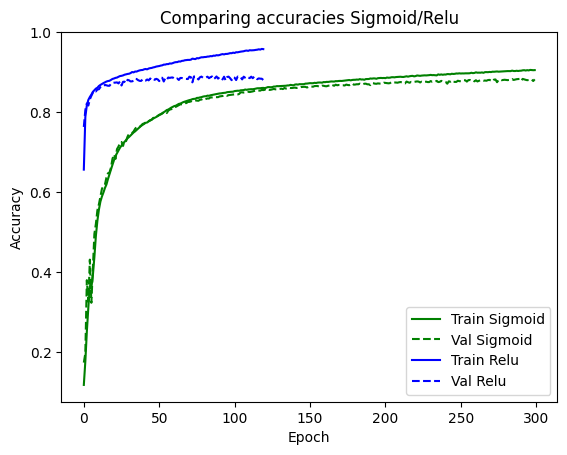

In [ ]:
plot_compare_losses(history_sigmoid, history_relu,
                   name1='Sigmoid', name2='Relu',
                   title='Comparing losses Sigmoid/Relu')
plot_compare_accs(history_sigmoid, history_relu,
                   name1='Sigmoid', name2='Relu',
                   title='Comparing accuracies Sigmoid/Relu')



---
**Task 3.** We have used a learning rate of 0.001, that it is not the default one. Try with 0.01.... what happens? Can you explain it?


---





In [ ]:
from tensorflow.keras.optimizers import SGD

# Set a higher learning rate of 0.01
sgd = SGD(learning_rate=0.01)

# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

# Train the model with 20% validation split
history_relu = model.fit(x_train, y_train,
                         batch_size=batch_size,
                         epochs=epochs,
                         verbose=1,
                         validation_split=0.2)

# Plot the results
plot_loss(history_relu, title='Loss with relu')
plot_acc(history_relu, title='Accuracy with relu')
plot_compare_losses(history_sigmoid, history_relu,
                    name1='Sigmoid', name2='Relu',
                    title='Comparing losses Sigmoid/Relu')
plot_compare_accs(history_sigmoid, history_relu,
                  name1='Sigmoid', name2='Relu',
                  title='Comparing accuracies Sigmoid/Relu')


Epoch 1/120
750/750 [==============================] - 4s 4ms/step - loss: 0.2521 - accuracy: 0.9091 - val_loss: 0.3322 - val_accuracy: 0.8800
Epoch 2/120
750/750 [==============================] - 4s 5ms/step - loss: 0.2483 - accuracy: 0.9096 - val_loss: 0.3328 - val_accuracy: 0.8811
Epoch 3/120
750/750 [==============================] - 3s 4ms/step - loss: 0.2463 - accuracy: 0.9112 - val_loss: 0.3285 - val_accuracy: 0.8828
Epoch 4/120
561/750 [=====================>........] - ETA: 0s - loss: 0.2438 - accuracy: 0.9115

KeyboardInterrupt: 

Your conclussions here......

## **Playing with different ways of initializing the weights and biases**

**The objective is to experiment with different initializations of the network paramenters and see and explain the consequences**



---


**Task 4.** Change the required parameters in the NN description to carry out a zero initialization of the parameters. Explain the **reason** of the results.


---




In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.initializers import Zeros
# Remember to create the model from scratch
model = Sequential()
# kernel_initializer sets the weights and it is set to 0
# bias_initializer sets the bias and has to be set to 0
model.add(Dense(128, activation='relu', input_shape=(784,), kernel_initializer=Zeros(), bias_initializer=Zeros()))
model.add(Dense(128, activation='relu', kernel_initializer=Zeros(), bias_initializer=Zeros()))
model.add(Dense(64, activation='relu', kernel_initializer=Zeros(), bias_initializer=Zeros()))
model.add(Dense(num_classes, activation='softmax', kernel_initializer=Zeros(), bias_initializer=Zeros()))
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_34 (Dense)            (None, 128)               100480    
                                                                 
 dense_35 (Dense)            (None, 128)               16512     
                                                                 
 dense_36 (Dense)            (None, 64)                8256      
                                                                 
 dense_37 (Dense)            (None, 10)                650       
                                                                 
Total params: 125898 (491.79 KB)
Trainable params: 125898 (491.79 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Compile the model
sgd = SGD(lr=0.001)
model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

# Train the model
history_relu = model.fit(x_train, y_train,
                         batch_size=batch_size,
                         epochs=epochs,
                         verbose=1,
                         validation_split=0.2)

Epoch 1/120
750/750 [==============================] - 4s 4ms/step - loss: 2.3026 - accuracy: 0.1008 - val_loss: 2.3027 - val_accuracy: 0.0957
Epoch 2/120
750/750 [==============================] - 3s 4ms/step - loss: 2.3026 - accuracy: 0.0983 - val_loss: 2.3027 - val_accuracy: 0.0957
Epoch 3/120
750/750 [==============================] - 3s 4ms/step - loss: 2.3026 - accuracy: 0.1005 - val_loss: 2.3027 - val_accuracy: 0.0957
Epoch 4/120
750/750 [==============================] - 4s 5ms/step - loss: 2.3026 - accuracy: 0.1007 - val_loss: 2.3027 - val_accuracy: 0.0957
Epoch 5/120
750/750 [==============================] - 3s 4ms/step - loss: 2.3026 - accuracy: 0.0996 - val_loss: 2.3027 - val_accuracy: 0.0957
Epoch 6/120
750/750 [==============================] - 3s 3ms/step - loss: 2.3026 - accuracy: 0.1004 - val_loss: 2.3027 - val_accuracy: 0.0957
Epoch 7/120
750/750 [==============================] - 3s 4ms/step - loss: 2.3026 - accuracy: 0.1008 - val_loss: 2.3027 - val_accuracy: 0.0957

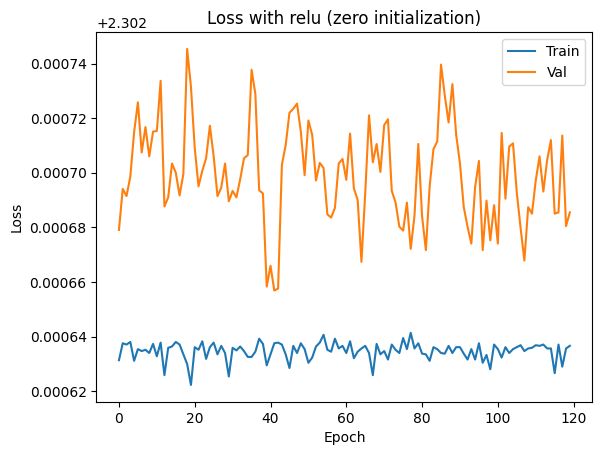

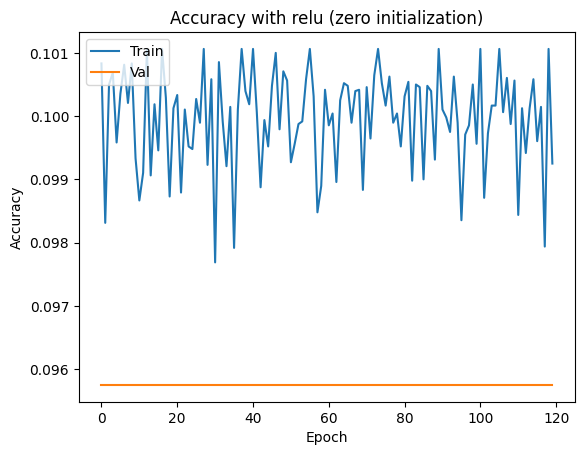

In [ ]:
plot_loss(history_relu, title='Loss with relu (zero initialization)')
plot_acc(history_relu, title='Accuracy with relu (zero initialization)')



---


**End of Task 4.** Explain here the reasons of the result you get with zero-initialization


---



---


**Task 5.** Change the required parameters in the NN description to carry out a normal distribution initialization of the parameters. Explain the **reason** of the results.


---

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.initializers import RandomNormal

# Create the model from scratch
model = Sequential()

# Add layers with RandomNormal initializer for both weights and biases
model.add(Dense(128, activation='relu', input_shape=(784,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.05), bias_initializer=RandomNormal(mean=0.0, stddev=0.05)))
model.add(Dense(128, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.05), bias_initializer=RandomNormal(mean=0.0, stddev=0.05)))
model.add(Dense(64, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.05), bias_initializer=RandomNormal(mean=0.0, stddev=0.05)))
model.add(Dense(num_classes, activation='softmax', kernel_initializer=RandomNormal(mean=0.0, stddev=0.05), bias_initializer=RandomNormal(mean=0.0, stddev=0.05)))

model.summary()


Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_38 (Dense)            (None, 128)               100480    
                                                                 
 dense_39 (Dense)            (None, 128)               16512     
                                                                 
 dense_40 (Dense)            (None, 64)                8256      
                                                                 
 dense_41 (Dense)            (None, 10)                650       
                                                                 
Total params: 125898 (491.79 KB)
Trainable params: 125898 (491.79 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
from tensorflow.keras.optimizers import SGD

sgd = SGD(lr=0.001)
epochs = 120

# Compile
model.compile(loss='categorical_crossentropy',
             optimizer=sgd,
             metrics=['accuracy'])

In [ ]:
# Train
history_relu = model.fit(x_train, y_train,
                   batch_size = batch_size,
                   epochs=epochs,
                   verbose=1,
                   validation_split = 0.2)

Epoch 1/120
750/750 [==============================] - 4s 4ms/step - loss: 2.0293 - accuracy: 0.3106 - val_loss: 1.2823 - val_accuracy: 0.5257
Epoch 2/120
750/750 [==============================] - 3s 4ms/step - loss: 1.0132 - accuracy: 0.6075 - val_loss: 0.8535 - val_accuracy: 0.6857
Epoch 3/120
750/750 [==============================] - 3s 4ms/step - loss: 0.7966 - accuracy: 0.7041 - val_loss: 0.7487 - val_accuracy: 0.7178
Epoch 4/120
750/750 [==============================] - 3s 4ms/step - loss: 0.6934 - accuracy: 0.7520 - val_loss: 0.6444 - val_accuracy: 0.7682
Epoch 5/120
750/750 [==============================] - 3s 4ms/step - loss: 0.6196 - accuracy: 0.7818 - val_loss: 0.5879 - val_accuracy: 0.7951
Epoch 6/120
750/750 [==============================] - 3s 4ms/step - loss: 0.5702 - accuracy: 0.8008 - val_loss: 0.5630 - val_accuracy: 0.7956
Epoch 7/120
750/750 [==============================] - 3s 4ms/step - loss: 0.5343 - accuracy: 0.8130 - val_loss: 0.5176 - val_accuracy: 0.8159

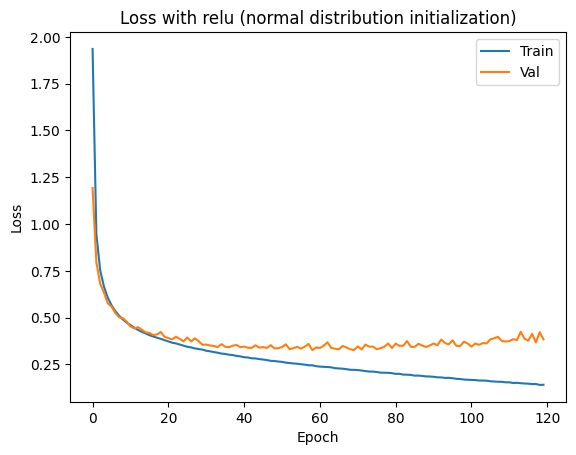

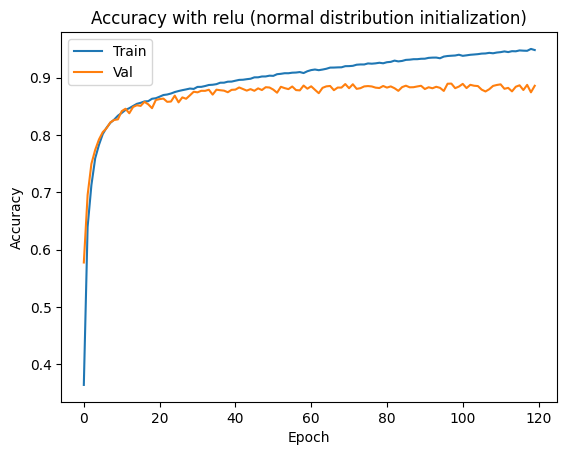

In [ ]:
plot_loss(history_relu, title='Loss with relu (normal distribution initialization)')
plot_acc(history_relu, title='Accuracy with relu (normal distribution initialization)')


---


**End of Task 5.** Explain here the reasons of the result you get with normal distribution initialization


---

## **Optimizers**



---


**Task 6.** RMSprop. Change the optimizer from SGD to RMSprop and select a good learning rate


---



In [ ]:
# RELU
model = Sequential() # remember that by defaul, the parameters are initialized with Xavier (Glorot)
model.add(Dense(128, activation='relu', input_shape=(784,)))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 128)               100480    
                                                                 
 dense_5 (Dense)             (None, 128)               16512     
                                                                 
 dense_6 (Dense)             (None, 64)                8256      
                                                                 
 dense_7 (Dense)             (None, 10)                650       
                                                                 
Total params: 125898 (491.79 KB)
Trainable params: 125898 (491.79 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
from tensorflow.keras.optimizers import RMSprop

rms = RMSprop(lr=0.01)# <------ select a learning rate
epochs = 120 # select number of epochs

# Compile
model.compile(loss='categorical_crossentropy',
             optimizer=rms,
             metrics=['accuracy'])

In [ ]:
# Train
history_relu = model.fit(x_train, y_train,
                   batch_size = batch_size,
                   epochs=epochs,
                   verbose=1,
                   validation_split = 0.2)

Epoch 1/120
750/750 [==============================] - 6s 6ms/step - loss: 0.5521 - accuracy: 0.7997 - val_loss: 0.4599 - val_accuracy: 0.8279
Epoch 2/120
750/750 [==============================] - 4s 6ms/step - loss: 0.3927 - accuracy: 0.8561 - val_loss: 0.3663 - val_accuracy: 0.8687
Epoch 3/120
750/750 [==============================] - 5s 6ms/step - loss: 0.3513 - accuracy: 0.8708 - val_loss: 0.3711 - val_accuracy: 0.8665
Epoch 4/120
750/750 [==============================] - 4s 5ms/step - loss: 0.3248 - accuracy: 0.8813 - val_loss: 0.3750 - val_accuracy: 0.8683
Epoch 5/120
750/750 [==============================] - 4s 5ms/step - loss: 0.3080 - accuracy: 0.8869 - val_loss: 0.3449 - val_accuracy: 0.8803
Epoch 6/120
750/750 [==============================] - 5s 7ms/step - loss: 0.2932 - accuracy: 0.8925 - val_loss: 0.3377 - val_accuracy: 0.8839
Epoch 7/120
750/750 [==============================] - 4s 5ms/step - loss: 0.2818 - accuracy: 0.8957 - val_loss: 0.3575 - val_accuracy: 0.8762

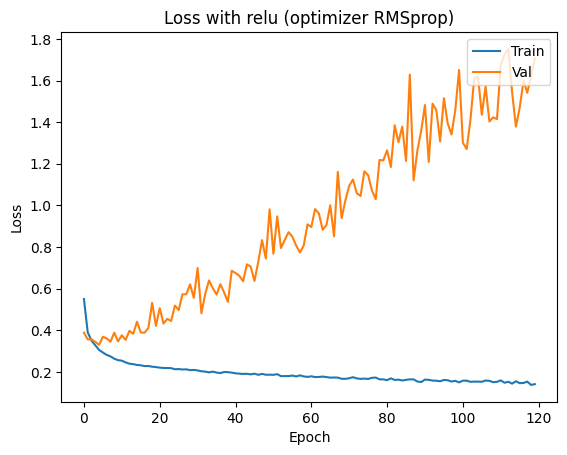

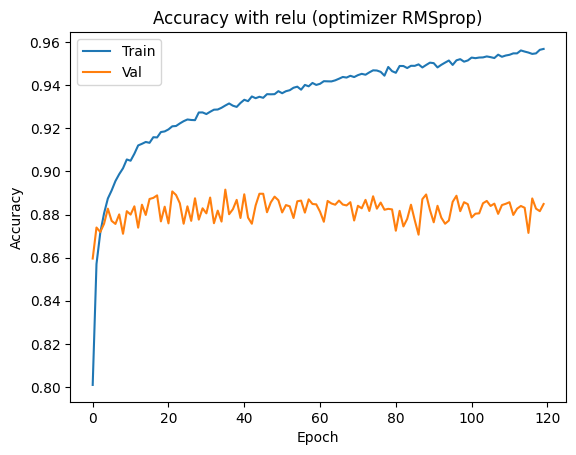

In [ ]:
plot_loss(history_relu, title='Loss with relu (optimizer RMSprop)')
plot_acc(history_relu, title='Accuracy with relu (optimizer RMSprop)')


---


**End of Task 6.** Explain here the reasons of the result you get with RMSprop

---


---


**Task 7.** Adam. Change the optimizer from SGD to Adam and select a good learning rate


---

In [ ]:
# RELU
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(784,)))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_28 (Dense)            (None, 128)               100480    
                                                                 
 dense_29 (Dense)            (None, 128)               16512     
                                                                 
 dense_30 (Dense)            (None, 64)                8256      
                                                                 
 dense_31 (Dense)            (None, 10)                650       
                                                                 
Total params: 125898 (491.79 KB)
Trainable params: 125898 (491.79 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
from tensorflow.keras.optimizers import Adam

adam = Adam(lr=0.001)#select a good learning rate#) # <-----------
epochs = 120 # select epochs

# Compile
model.compile(loss='categorical_crossentropy',
             optimizer=adam,
             metrics=['accuracy'])

In [ ]:
# Train
history_relu = model.fit(x_train, y_train,
                   batch_size = batch_size,
                   epochs=epochs,
                   verbose=1,
                   validation_split = 0.2)

In [ ]:
plot_loss(history_relu, title='Loss with relu (optimizer Adam)')
plot_acc(history_relu, title='Accuracy with relu (optimizer Adam)')

---


**End of Task 7.** Explain here the reasons of the result you get with Adam

---

## **Regularization and your final proposal**

**Task 8**: Try to train the NN using different possibilities in order to get an accuracy around 90% in validation, changing if you want:

* Number of neurons/layers
* Optimizers and parameters
* Batch size's
* Activation units
* Use of dropout, L2, L1 regularization ...
* Early stopping (or just looking the final charts or using a 'callback' as explained in the slides of Keras introduction)
* Batch normalization

Explain what is the process that you have followed to find your final proposal and the results.

Make a final evaluation with the 'test' dataset

In [9]:
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the model with increased capacity
model = tf.keras.Sequential([
    Dense(512, activation='relu', kernel_regularizer=l2(0.001), input_shape=(x_train.shape[1],)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(256, activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(128, activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(64, activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])


In [20]:
# Define the Adam optimizer
adam = Adam(learning_rate=0.00005)

# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer=adam,
              metrics=['accuracy'])

# Learning rate scheduler
def scheduler(epoch, lr):
    if epoch < 10:
        return lr
    else:
        return lr * tf.math.exp(-0.1)

lr_scheduler = LearningRateScheduler(scheduler)

# Implement early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Define training parameters
batch_size = 60
epochs = 60

In [21]:
# Train .....
history_relu = model.fit(x_train, y_train,
                   batch_size = batch_size,
                   epochs=epochs,
                   verbose=1,
                   validation_split = 0.2)

Epoch 1/60
800/800 [==============================] - 15s 16ms/step - loss: 0.7242 - accuracy: 0.8799 - val_loss: 0.6936 - val_accuracy: 0.8895
Epoch 2/60
800/800 [==============================] - 12s 15ms/step - loss: 0.7179 - accuracy: 0.8813 - val_loss: 0.6959 - val_accuracy: 0.8863
Epoch 3/60
800/800 [==============================] - 12s 14ms/step - loss: 0.7096 - accuracy: 0.8811 - val_loss: 0.6739 - val_accuracy: 0.8903
Epoch 4/60
800/800 [==============================] - 13s 16ms/step - loss: 0.7037 - accuracy: 0.8827 - val_loss: 0.6773 - val_accuracy: 0.8895
Epoch 5/60
800/800 [==============================] - 12s 15ms/step - loss: 0.6920 - accuracy: 0.8838 - val_loss: 0.6622 - val_accuracy: 0.8896
Epoch 6/60
800/800 [==============================] - 12s 15ms/step - loss: 0.6868 - accuracy: 0.8835 - val_loss: 0.6519 - val_accuracy: 0.8889
Epoch 7/60
800/800 [==============================] - 13s 16ms/step - loss: 0.6806 - accuracy: 0.8819 - val_loss: 0.6434 - val_accuracy:

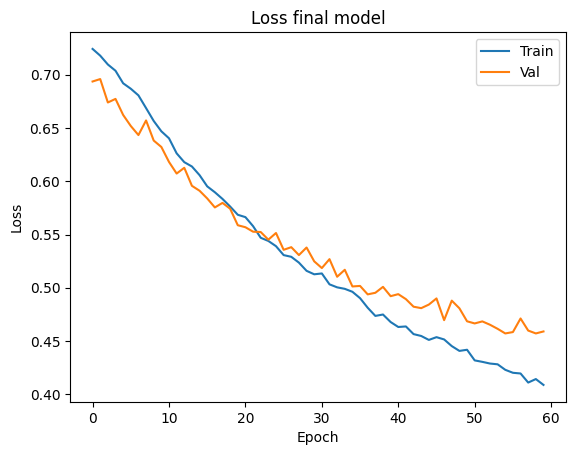

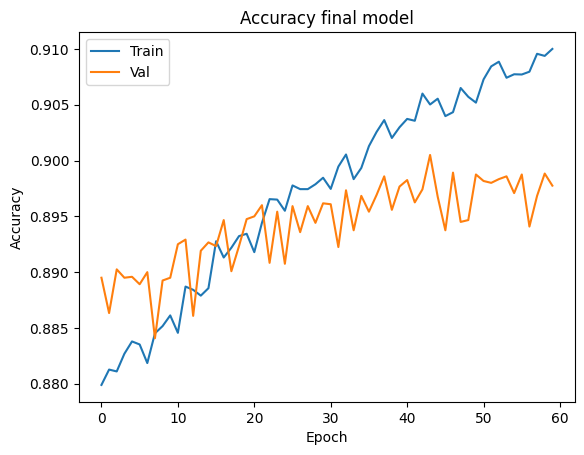

In [22]:
plot_loss(history_relu, title='Loss final model')
plot_acc(history_relu, title='Accuracy final model')

### Evaluate your final model with the test data

In [23]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.4852716326713562
Test accuracy: 0.8920000195503235
